In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab_Notebooks/BML')

Mounted at /content/drive


2023/12/07 跑 Cross Validation Result of Different Encoding Method

# Download Packages

BioPython

In [14]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00


iFeature

In [7]:
os.chdir('/content/drive/MyDrive')

In [8]:
!git clone https://github.com/Superzchen/iFeature

fatal: destination path 'iFeature' already exists and is not an empty directory.


In [9]:
%cd iFeature

/content/drive/MyDrive/iFeature


In [10]:
!python iFeature.py --help

usage: it's usage tip.

Generating various numerical representation schemes for protein sequences

options:
  -h, --help            show this help message and exit
  --file FILE           input fasta file
  --type {AAC,EAAC,CKSAAP,DPC,DDE,TPC,BINARY,GAAC,EGAAC,CKSAAGP,GDPC,GTPC,AAINDEX,ZSCALE,BLOSUM62,NMBroto,Moran,Geary,CTDC,CTDT,CTDD,CTriad,KSCTriad,SOCNumber,QSOrder,PAAC,APAAC,KNNprotein,KNNpeptide,PSSM,SSEC,SSEB,Disorder,DisorderC,DisorderB,ASA,TA}
                        the encoding type
  --path FILEPATH       data file path used for 'PSSM', 'SSEB(C)', 'Disorder(BC)', 'ASA' and 'TA'
                        encodings
  --train TRAINFILE     training file in fasta format only used for 'KNNprotein' or 'KNNpeptide'
                        encodings
  --label LABELFILE     sample label file only used for 'KNNprotein' or 'KNNpeptide' encodings
  --order {alphabetically,polarity,sideChainVolume,userDefined}
                        output order for of Amino Acid Composition (i.e. AAC, E

# Start Analysis

In [15]:
from Bio import SeqIO
import numpy as np

In [16]:
import pandas as pd

# Load the File Path
pos_file_path = "/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta"
neg_file_path = "/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta"

# Load Sequences from the File
def load_seq(file_path):
  with open(file_path, 'r') as file:
    return[str(record.seq) for record in SeqIO.parse(file, "fasta")]

# Load Positive and Negative sequence
pos_seq = load_seq(pos_file_path)
neg_seq = load_seq(neg_file_path)

# The number of Sequences of Pos and Neg
len_pos_seq = len(pos_seq)
len_neg_seq = len(neg_seq)

len_pos_seq, len_neg_seq

(4960, 37625)

In [ ]:
pos_seq[:6]

['PMAAMFGGIVGQEVVKACSGKFHPLYQFFYF',
 'IQTLDDHALSPDVQEKLVRENPPEGVFKIKG',
 'CGKLRFYCWDTAGQEKFGGLRDGYYIHGQCA',
 'MGRTGSRGQVTQVRVKFLDDQNRLIMRNVKG',
 'IPGRATGAYSHSQGIKGLRDAIAAGIASRDG',
 'VSETDEYKEKTIDSEKDGQFRVQPRWRKFLA']

# Encoding

## One Hot Encoding

### Positive Sequence

In [18]:
# Instead of creating a dataframe, we will encode each sequence as a string of 0s and 1s
# where each amino acid is represented by a 20-character string (for the 20 amino acids)
# and all sequences are concatenated in the same line separated by commas

def one_hot_encode_string(sequence):
    encoding = ''
    for amino_acid in sequence:
        if amino_acid in amino_acids:
            # Create a string of 0s with a 1 at the position of the amino acid
            index = amino_acids.index(amino_acid)
            encoding += '0' * index + '1' + '0' * (len(amino_acids) - index - 1)
        else:
            # If the amino acid is not recognized, use a string of 0s
            encoding += '0' * len(amino_acids)
    return encoding

# Encoding all sequences
encoded_sequences_string = {seq_id: one_hot_encode_string(seq) for seq_id, seq in sequences.items()}

# Creating a new file with the string-encoded sequences
output_file_path_string = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/one_hot_encoded_sequences_string.csv'

with open(output_file_path_string, 'w') as output_file:
    for seq_id, encoded_str in encoded_sequences_string.items():
        output_file.write(f"{seq_id},{encoded_str}\n")

output_file_path


KeyError: ignored

In [ ]:
one_hot_encoded_pos

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load sequences from the file
def load_seq(file_path):
    with open(file_path, 'r') as file:
        return [str(record.seq) for record in SeqIO.parse(file, "fasta")]

# One-hot encode the sequences
one_hot_encoded_pos = np.array([one_hot_encoding(seq) for seq in pos_seq])
one_hot_encoded_neg = np.array([one_hot_encoding(seq) for seq in neg_seq])

# Since sequences can have different lengths, we need to handle this before saving to CSV
# Find the maximum sequence length
max_len = max(max([len(seq) for seq in one_hot_encoded_pos]), max([len(seq) for seq in one_hot_encoded_neg]))

# Function to pad sequences to the same length
def pad_sequences(sequences, max_len):
    return np.array([np.pad(seq, ((0, max_len - len(seq)), (0, 0)), mode='constant') for seq in sequences])

# Pad the sequences
padded_pos = pad_sequences(one_hot_encoded_pos, max_len)
padded_neg = pad_sequences(one_hot_encoded_neg, max_len)

# Flatten the encoded sequences for CSV
flattened_pos = padded_pos.reshape(len(padded_pos), -1)
flattened_neg = padded_neg.reshape(len(padded_neg), -1)

# Create labels
pos_labels = np.ones(len(flattened_pos))
neg_labels = np.zeros(len(flattened_neg))

# Combine data and labels
data = np.vstack((flattened_pos, flattened_neg))
labels = np.concatenate((pos_labels, neg_labels))

# Convert to DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Save to CSV
csv_file_path = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/One_hot.csv'
df.to_csv(csv_file_path, index=False)

csv_file_path

'/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/One_hot.csv'

### Negative Sequence

In [ ]:
def one_hot_encoding(sequence):
  amino_acids = 'ARNDCEQGHILKMFPSTWYV'

  # Create a dictionary for mapping amino acids into vectors
  mapping = {aa:[int(i == aa) for i in amino_acids] for aa in amino_acids}

  # Encode the sequences
  return np.array([mapping.get(aa, [0]*20) for aa in sequence])

one_hot_encoded_neg = [one_hot_encoding(seq) for seq in neg_seq]

# Shape of One-Hot Encoding
# one_hot_encoded_seq_shape = [encoded_seq.shape for encoded_seq in one_hot_encoded_sequences]

In [ ]:
one_hot_encoded_neg

### Both Positive and Negative

In [ ]:
from Bio import SeqIO
import pandas as pd

# Load data from FASTA files
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Paths to the files
file_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta'
file_pos = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta'

# Load the sequences
neg_sequences = load_fasta(file_neg)
pos_sequences = load_fasta(file_pos)

# Creating a DataFrame
df_neg = pd.DataFrame({'sequence': neg_sequences, 'label': 0}) # Negative samples
df_pos = pd.DataFrame({'sequence': pos_sequences, 'label': 1}) # Positive samples

# Balancing the dataset
min_samples = min(len(df_neg), len(df_pos))
balanced_neg = df_neg.sample(n=min_samples, random_state=1)
balanced_pos = df_pos.sample(n=min_samples, random_state=1)
balanced_df = pd.concat([balanced_neg, balanced_pos]).reset_index(drop=True)

balanced_df.head(), len(balanced_neg), len(balanced_pos)


(                          sequence  label
 0  GVHCKQYYSLDITYFKSSLDSHLLDLLWNKY      0
 1  QFGGCSCWASNMGLVKDGAADLEEGTLEIGM      0
 2  ARSEAAMISDGCQWRKYGQKMAKGNPCPRAY      0
 3  VGVGLSPQYPQQQGGKYGGARKTTPVKITHP      0
 4  QAEAAPPSQSALTTSKSQGASPVTGSKGQSQ      0,
 4960,
 4960)

## AAC(Amino Acid Composition)

### Positive Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta --type AAC --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/AAC.txt

Descriptor type: AAC


In [ ]:
import pandas as pd
data_pos = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/AAC.txt', sep = '\t')
data_pos.head()

,#,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Q2RBM4,0.096774,0.032258,0.000000,0.032258,0.161290,0.129032,0.032258,0.032258,0.064516,...,0.064516,0.000000,0.064516,0.064516,0.000000,0.032258,0.000000,0.096774,0.000000,0.064516
1,A0A4S4ESM7,0.032258,0.000000,0.096774,0.096774,0.032258,0.064516,0.032258,0.064516,0.096774,...,0.000000,0.032258,0.096774,0.064516,0.032258,0.032258,0.032258,0.096774,0.000000,0.000000
2,A0A4S4E3R0,0.064516,0.096774,0.064516,0.032258,0.064516,0.193548,0.032258,0.032258,0.064516,...,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.032258,0.000000,0.032258,0.096774
3,B9FBI5,0.000000,0.000000,0.064516,0.000000,0.032258,0.129032,0.000000,0.032258,0.064516,...,0.064516,0.064516,0.000000,0.096774,0.161290,0.032258,0.064516,0.129032,0.000000,0.000000
4,A0A0P0XUE4,0.193548,0.000000,0.064516,0.000000,0.000000,0.193548,0.032258,0.129032,0.032258,...,0.000000,0.000000,0.032258,0.032258,0.096774,0.096774,0.032258,0.000000,0.000000,0.032258


In [ ]:
df_pos = pd.DataFrame(data_pos)
df_pos.head()

,#,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Q2RBM4,0.096774,0.032258,0.000000,0.032258,0.161290,0.129032,0.032258,0.032258,0.064516,...,0.064516,0.000000,0.064516,0.064516,0.000000,0.032258,0.000000,0.096774,0.000000,0.064516
1,A0A4S4ESM7,0.032258,0.000000,0.096774,0.096774,0.032258,0.064516,0.032258,0.064516,0.096774,...,0.000000,0.032258,0.096774,0.064516,0.032258,0.032258,0.032258,0.096774,0.000000,0.000000
2,A0A4S4E3R0,0.064516,0.096774,0.064516,0.032258,0.064516,0.193548,0.032258,0.032258,0.064516,...,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.032258,0.000000,0.032258,0.096774
3,B9FBI5,0.000000,0.000000,0.064516,0.000000,0.032258,0.129032,0.000000,0.032258,0.064516,...,0.064516,0.064516,0.000000,0.096774,0.161290,0.032258,0.064516,0.129032,0.000000,0.000000
4,A0A0P0XUE4,0.193548,0.000000,0.064516,0.000000,0.000000,0.193548,0.032258,0.129032,0.032258,...,0.000000,0.000000,0.032258,0.032258,0.096774,0.096774,0.032258,0.000000,0.000000,0.032258


In [ ]:
df_pos.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_pos.csv")

### Negative Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta --type AAC --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/AAC_neg.txt

Descriptor type: AAC


In [ ]:
data_neg = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/AAC_neg.txt", sep = "\t")
data_neg.head()

,#,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Q2RBM4,0.096774,0.000000,0.161290,0.129032,0.000000,0.032258,0.096774,0.000000,0.096774,...,0.032258,0.032258,0.032258,0.000000,0.096774,0.000000,0.096774,0.032258,0.0,0.000000
1,Q2RBM4,0.064516,0.000000,0.032258,0.032258,0.032258,0.096774,0.032258,0.000000,0.032258,...,0.032258,0.064516,0.000000,0.032258,0.096774,0.096774,0.032258,0.096774,0.0,0.032258
2,Q2RBM4,0.096774,0.000000,0.064516,0.032258,0.000000,0.129032,0.032258,0.032258,0.064516,...,0.000000,0.129032,0.000000,0.000000,0.000000,0.064516,0.000000,0.161290,0.0,0.000000
3,Q2RBM4,0.064516,0.032258,0.064516,0.064516,0.096774,0.000000,0.064516,0.064516,0.032258,...,0.000000,0.064516,0.064516,0.064516,0.000000,0.096774,0.032258,0.096774,0.0,0.032258
4,Q2RBM4,0.032258,0.064516,0.064516,0.032258,0.161290,0.096774,0.064516,0.096774,0.032258,...,0.000000,0.032258,0.064516,0.032258,0.032258,0.096774,0.000000,0.032258,0.0,0.032258


In [ ]:
df_neg = pd.DataFrame(data_neg)
df_neg.head()

,#,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,Q2RBM4,0.096774,0.000000,0.161290,0.129032,0.000000,0.032258,0.096774,0.000000,0.096774,...,0.032258,0.032258,0.032258,0.000000,0.096774,0.000000,0.096774,0.032258,0.0,0.000000
1,Q2RBM4,0.064516,0.000000,0.032258,0.032258,0.032258,0.096774,0.032258,0.000000,0.032258,...,0.032258,0.064516,0.000000,0.032258,0.096774,0.096774,0.032258,0.096774,0.0,0.032258
2,Q2RBM4,0.096774,0.000000,0.064516,0.032258,0.000000,0.129032,0.032258,0.032258,0.064516,...,0.000000,0.129032,0.000000,0.000000,0.000000,0.064516,0.000000,0.161290,0.0,0.000000
3,Q2RBM4,0.064516,0.032258,0.064516,0.064516,0.096774,0.000000,0.064516,0.064516,0.032258,...,0.000000,0.064516,0.064516,0.064516,0.000000,0.096774,0.032258,0.096774,0.0,0.032258
4,Q2RBM4,0.032258,0.064516,0.064516,0.032258,0.161290,0.096774,0.064516,0.096774,0.032258,...,0.000000,0.032258,0.064516,0.032258,0.032258,0.096774,0.000000,0.032258,0.0,0.032258


In [ ]:
df_neg.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_neg.csv")

### Each Pos Seq - Self Carved

In [ ]:
def calculate_aac(sequence):
  amino_acids = 'ARNDCEQGHILKMFPSTWYVX'
  sequence_length = len(sequence)

  # Calculate the Frequency of each amino acid
  aac = {aa:sequence.count(aa) / sequence_length for aa in amino_acids}
  return aac


def calculate_aac_for_sequences(sequences):
    # Calculate AAC for each sequence
    return [calculate_aac(seq) for seq in sequences]

aac_pos = calculate_aac_for_sequences(pos_seq)

aac_pos[:6]




[{'A': 0.0967741935483871,
  'R': 0.0,
  'N': 0.0,
  'D': 0.0,
  'C': 0.03225806451612903,
  'E': 0.03225806451612903,
  'Q': 0.06451612903225806,
  'G': 0.12903225806451613,
  'H': 0.03225806451612903,
  'I': 0.03225806451612903,
  'L': 0.03225806451612903,
  'K': 0.06451612903225806,
  'M': 0.06451612903225806,
  'F': 0.16129032258064516,
  'P': 0.06451612903225806,
  'S': 0.03225806451612903,
  'T': 0.0,
  'W': 0.0,
  'Y': 0.06451612903225806,
  'V': 0.0967741935483871,
  'X': 0.0},
 {'A': 0.03225806451612903,
  'R': 0.03225806451612903,
  'N': 0.03225806451612903,
  'D': 0.0967741935483871,
  'C': 0.0,
  'E': 0.0967741935483871,
  'Q': 0.06451612903225806,
  'G': 0.06451612903225806,
  'H': 0.03225806451612903,
  'I': 0.06451612903225806,
  'L': 0.0967741935483871,
  'K': 0.0967741935483871,
  'M': 0.0,
  'F': 0.03225806451612903,
  'P': 0.0967741935483871,
  'S': 0.03225806451612903,
  'T': 0.03225806451612903,
  'W': 0.0,
  'Y': 0.0,
  'V': 0.0967741935483871,
  'X': 0.0},
 {'A':

### Overall Pos Seq - Self Carved

In [ ]:
import pandas as pd
df_pos = pd.DataFrame(aac_pos)

In [ ]:
df_pos

,A,R,N,D,C,E,Q,G,H,I,...,K,M,F,P,S,T,W,Y,V,X
0,0.096774,0.000000,0.000000,0.000000,0.032258,0.032258,0.064516,0.129032,0.032258,0.032258,...,0.064516,0.064516,0.161290,0.064516,0.032258,0.000000,0.000000,0.064516,0.096774,0.0
1,0.032258,0.032258,0.032258,0.096774,0.000000,0.096774,0.064516,0.064516,0.032258,0.064516,...,0.096774,0.000000,0.032258,0.096774,0.032258,0.032258,0.000000,0.000000,0.096774,0.0
2,0.064516,0.064516,0.000000,0.064516,0.096774,0.032258,0.064516,0.193548,0.032258,0.032258,...,0.064516,0.000000,0.064516,0.000000,0.000000,0.032258,0.032258,0.096774,0.000000,0.0
3,0.000000,0.161290,0.064516,0.064516,0.000000,0.000000,0.096774,0.129032,0.000000,0.032258,...,0.064516,0.064516,0.032258,0.000000,0.032258,0.064516,0.000000,0.000000,0.129032,0.0
4,0.193548,0.096774,0.000000,0.064516,0.000000,0.000000,0.032258,0.193548,0.032258,0.129032,...,0.032258,0.000000,0.000000,0.032258,0.096774,0.032258,0.000000,0.032258,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,0.258065,0.096774,0.032258,0.000000,0.000000,0.161290,0.064516,0.032258,0.000000,0.064516,...,0.096774,0.000000,0.064516,0.000000,0.064516,0.000000,0.000000,0.000000,0.032258,0.0
4956,0.064516,0.064516,0.000000,0.000000,0.032258,0.064516,0.000000,0.161290,0.096774,0.000000,...,0.096774,0.000000,0.032258,0.032258,0.064516,0.032258,0.064516,0.064516,0.096774,0.0
4957,0.000000,0.193548,0.032258,0.032258,0.000000,0.225806,0.096774,0.032258,0.064516,0.032258,...,0.064516,0.000000,0.032258,0.032258,0.000000,0.032258,0.000000,0.000000,0.000000,0.0
4958,0.000000,0.096774,0.032258,0.032258,0.032258,0.032258,0.096774,0.129032,0.000000,0.064516,...,0.064516,0.032258,0.000000,0.032258,0.064516,0.032258,0.000000,0.064516,0.096774,0.0


In [ ]:
pos_mean = df_pos.mean()
pos_mean

A    0.086563
R    0.072099
N    0.035068
D    0.059268
C    0.009814
E    0.086622
Q    0.036609
G    0.068028
H    0.017235
I    0.044726
L    0.077829
K    0.100520
M    0.018958
F    0.028421
P    0.044726
S    0.070129
T    0.046547
W    0.007382
Y    0.022594
V    0.066864
X    0.000000
dtype: float64

In [ ]:
df_pos_mean = pd.DataFrame(list(pos_mean.items()), columns=['AminoAcid', 'Frequency'])
df_pos_mean

,AminoAcid,Frequency
0,A,0.086563
1,R,0.072099
2,N,0.035068
3,D,0.059268
4,C,0.009814
5,E,0.086622
6,Q,0.036609
7,G,0.068028
8,H,0.017235
9,I,0.044726


## AAPC (Amino acid pair composition)

### Overall Pos Seq - Self Carved

In [ ]:
def calculate_aapc(sequence):
    amino_acids = 'ARNDCEQGHILKMFPSTWYVX'
    sequence_length = len(sequence)
    aapc = {aa1 + aa2: 0 for aa1 in amino_acids for aa2 in amino_acids}

    # 确保序列是字符串
    if isinstance(sequence, list):
        sequence = ''.join(sequence)

    for i in range(sequence_length - 1):
        pair = sequence[i:i+2]
        if pair in aapc:
            aapc[pair] += 1

    for pair in aapc:
        aapc[pair] /= (sequence_length - 1)

    return aapc

# 示例
aapc = calculate_aapc(pos_seq)


In [ ]:
aapc

{'AA': 0.013107481347045775,
 'AR': 0.004436378302077031,
 'AN': 0.0028231498285944748,
 'AD': 0.003629764065335753,
 'AC': 0.0008066142367412785,
 'AE': 0.008872756604154063,
 'AQ': 0.001613228473482557,
 'AG': 0.006452913893930228,
 'AH': 0.0014115749142972374,
 'AI': 0.004638031861262351,
 'AL': 0.006856221012300867,
 'AK': 0.008671103044968743,
 'AM': 0.0030248033877797943,
 'AF': 0.0014115749142972374,
 'AP': 0.005847953216374269,
 'AS': 0.006251260334744909,
 'AT': 0.0028231498285944748,
 'AW': 0.0006049606775559589,
 'AY': 0.0018148820326678765,
 'AV': 0.00524299253881831,
 'AX': 0.0,
 'RA': 0.006049606775559589,
 'RR': 0.003629764065335753,
 'RN': 0.0028231498285944748,
 'RD': 0.003629764065335753,
 'RC': 0.00040330711837063924,
 'RE': 0.0054446460980036296,
 'RQ': 0.0022181891510385156,
 'RG': 0.004638031861262351,
 'RH': 0.0012099213551119178,
 'RI': 0.0030248033877797943,
 'RL': 0.0054446460980036296,
 'RK': 0.0056462996571889496,
 'RM': 0.002016535591853196,
 'RF': 0.002218

### Each Pos Seq - Self Carved

In [ ]:
def calculate_aapc(sequence):
    amino_acids = 'ARNDCEQGHILKMFPSTWYVX'
    sequence_length = len(sequence)
    # Initialize a dictionary
    aapc = {aa1 + aa2: 0 for aa1 in amino_acids for aa2 in amino_acids}

    # make sure the sequence is string
    if isinstance(sequence, list):
        sequence = ''.join(sequence)

 # Calculate the times of each aa appears
    for i in range(sequence_length - 1):
        pair = sequence[i:i+2]
        if pair in aapc:
            aapc[pair] += 1

 # 將次數轉換成頻率
    for pair in aapc:
      aapc[pair] /= (sequence_length - 1)

    return aapc

def calculate_aapc_for_each_sequence(sequences):
    # 對每個序列單獨計算AAPC
    return [calculate_aapc(seq) for seq in sequences]

aapc_pos = calculate_aapc_for_each_sequence(pos_seq)

aapc = calculate_aapc(pos_seq)

# print
for i in range(6):
    print(f"AAPC for positive sequence {i+1}:")
    print(aapc_pos[i])

AAPC for positive sequence 1:
{'AA': 0.03333333333333333, 'AR': 0.0, 'AN': 0.0, 'AD': 0.0, 'AC': 0.03333333333333333, 'AE': 0.0, 'AQ': 0.0, 'AG': 0.0, 'AH': 0.0, 'AI': 0.0, 'AL': 0.0, 'AK': 0.0, 'AM': 0.03333333333333333, 'AF': 0.0, 'AP': 0.0, 'AS': 0.0, 'AT': 0.0, 'AW': 0.0, 'AY': 0.0, 'AV': 0.0, 'AX': 0.0, 'RA': 0.0, 'RR': 0.0, 'RN': 0.0, 'RD': 0.0, 'RC': 0.0, 'RE': 0.0, 'RQ': 0.0, 'RG': 0.0, 'RH': 0.0, 'RI': 0.0, 'RL': 0.0, 'RK': 0.0, 'RM': 0.0, 'RF': 0.0, 'RP': 0.0, 'RS': 0.0, 'RT': 0.0, 'RW': 0.0, 'RY': 0.0, 'RV': 0.0, 'RX': 0.0, 'NA': 0.0, 'NR': 0.0, 'NN': 0.0, 'ND': 0.0, 'NC': 0.0, 'NE': 0.0, 'NQ': 0.0, 'NG': 0.0, 'NH': 0.0, 'NI': 0.0, 'NL': 0.0, 'NK': 0.0, 'NM': 0.0, 'NF': 0.0, 'NP': 0.0, 'NS': 0.0, 'NT': 0.0, 'NW': 0.0, 'NY': 0.0, 'NV': 0.0, 'NX': 0.0, 'DA': 0.0, 'DR': 0.0, 'DN': 0.0, 'DD': 0.0, 'DC': 0.0, 'DE': 0.0, 'DQ': 0.0, 'DG': 0.0, 'DH': 0.0, 'DI': 0.0, 'DL': 0.0, 'DK': 0.0, 'DM': 0.0, 'DF': 0.0, 'DP': 0.0, 'DS': 0.0, 'DT': 0.0, 'DW': 0.0, 'DY': 0.0, 'DV': 0.0, 'DX': 0.

## PWM(Positional Weighted Matrix)

In [ ]:
def calculate_pwm(sequences):
    amino_acids = 'ARNDCEQGHILKMFPSTWYVX'
    sequence_length = len(sequences[0])
    count_matrix = np.zeros((len(amino_acids), sequence_length))

    for seq in sequences:
        for i, aa in enumerate(seq):
            if aa in amino_acids:
                count_matrix[amino_acids.index(aa), i] += 1

    frequency_matrix = count_matrix / len(sequences)

    # count numbers => frequency
    pwm = {amino_acid: frequency_matrix[i, :] for i, amino_acid in enumerate(amino_acids)}
    return pwm

# 假設 sequences 是一組相關的蛋白質序列
pwm_matrix = calculate_pwm(pos_seq)

# print
print("PWM for first few seq:")
for aa in pwm_matrix:
    print(f"{aa}: {pwm_matrix[aa][:5]}")  # 展示每个氨基酸在前5个位置的频率

PWM for first few seq:
A: [0.08790323 0.08729839 0.09032258 0.09153226 0.08508065]
R: [0.06532258 0.07197581 0.07520161 0.06975806 0.0796371 ]
N: [0.03669355 0.0358871  0.04133065 0.03407258 0.04052419]
D: [0.06209677 0.06391129 0.05725806 0.06653226 0.06189516]
C: [0.01471774 0.0108871  0.01189516 0.01169355 0.01008065]
E: [0.0796371  0.07943548 0.07620968 0.08689516 0.08830645]
Q: [0.03891129 0.03830645 0.03508065 0.0358871  0.03568548]
G: [0.07137097 0.07782258 0.07016129 0.07258065 0.06633065]
H: [0.01915323 0.0171371  0.01794355 0.02096774 0.02116935]
I: [0.04052419 0.04435484 0.04979839 0.04193548 0.04697581]
L: [0.08548387 0.07842742 0.08104839 0.0796371  0.07580645]
K: [0.07177419 0.07399194 0.07439516 0.07903226 0.07540323]
M: [0.02802419 0.02258065 0.01834677 0.02056452 0.01915323]
F: [0.02862903 0.03245968 0.03125    0.02762097 0.03064516]
P: [0.05241935 0.05383065 0.04818548 0.04354839 0.04657258]
S: [0.06975806 0.06995968 0.06935484 0.06995968 0.07520161]
T: [0.04818548 0.

## EAAC

### Positiv Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta --type EAAC --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.txt

Descriptor type: EAAC


In [ ]:
EAAC_pos = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.txt", sep = "\t")
EAAC_pos.head()

,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,SW.1.K,...,SW.27.M,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y
0,Q2RBM4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2
1,A0A4S4ESM7,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0A4S4E3R0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.2,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
3,B9FBI5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0
4,A0A0P0XUE4,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0


In [ ]:
df_EAAC_pos = pd.DataFrame(EAAC_pos)
df_EAAC_pos.head()

,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,SW.1.K,...,SW.27.M,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y
0,Q2RBM4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2
1,A0A4S4ESM7,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0A4S4E3R0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.2,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
3,B9FBI5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0
4,A0A0P0XUE4,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0


In [ ]:
df_EAAC_pos.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv")

### Negative Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta --type EAAC --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.txt

Descriptor type: EAAC


In [ ]:
EAAC_neg = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.txt", sep = "\t")

df_EAAC_neg = pd.DataFrame(EAAC_neg)
df_EAAC_neg.head()

,#,SW.1.A,SW.1.C,SW.1.D,SW.1.E,SW.1.F,SW.1.G,SW.1.H,SW.1.I,SW.1.K,...,SW.27.M,SW.27.N,SW.27.P,SW.27.Q,SW.27.R,SW.27.S,SW.27.T,SW.27.V,SW.27.W,SW.27.Y
0,Q2RBM4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,...,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
1,Q2RBM4,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Q2RBM4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Q2RBM4,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,Q2RBM4,0.0,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_EAAC_neg.to_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv")

## PSSM(Position-specific scoring matrix)

In [ ]:
%ls

AAC.txt     clusters/  data/      feaSelector.py     iFeatureManual.pdf   iFeature.py  README.md
cluster.py  codes/     examples/  featureSelection/  iFeaturePseKRAAC.py  PseKRAAC/    scripts/


In [ ]:
%cd scripts/
%ls

[Errno 2] No such file or directory: 'scripts/'
/content/drive/MyDrive/iFeature/scripts
generateDisorder.py     generateSecondaryStructure.py  ldaAnalysis.py  tsneAnalysis.py
generatePSSMProfile.py  __init__.py                    pcaAnalysis.py


In [ ]:
!python generatePSSMProfile.py --help

usage: it's usage tip.

generate PSSM profile

options:
  -h, --help           show this help message and exit
  --file FILE          protein sequence file in fasta format
  --blastpgp BLASTPGP  the path of NCBI psiblast program
  --db DB              the path of unief50 database


In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta --type PSSM --path /content/drive/MyDrive/Colab_Notebooks/BML/Ass3

Descriptor type: PSSM
Error: pssm prfile for protein Q2RBM4 does not exist.


In [ ]:
%ls
%pwd

generateDisorder.py     generateSecondaryStructure.py  ldaAnalysis.py  pcaAnalysis.py
generatePSSMProfile.py  __init__.py                    out/            tsneAnalysis.py


'/content/drive/MyDrive/iFeature/scripts'

In [ ]:
%cd out/

/content/drive/MyDrive/iFeature/scripts/out


In [ ]:
python iFeature.py --file examples/test-peptide.txt --type PSSM --path /content/drive/MyDrive/Colab_Notebooks/BML/Ass3

## CKSAAP

### Positive Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta --type CKSAAP --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass3/CKSAAP_pos.txt

In [ ]:
import pandas as pd

output_file_pos = "/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/CKSAAP_pos.txt"
CKSAAP_pos = pd.read_csv(output_file_pos, sep = "\t")
CKSAAP_pos.head()

### Negative Sequence - iFeature

In [ ]:
!python iFeature.py --file /content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta --type CKSAAP --out /content/drive/MyDrive/Colab_Notebooks/BML/Ass3/CKSAAP_neg.txt

Descriptor type: CKSAAP


In [ ]:
import pandas as pd

output_file_neg = "/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/CKSAAP_neg.txt"
CKSAAP_neg = pd.read_csv(output_file_neg, sep = "\t")
CKSAAP_neg.head()

,#,AA.gap0,AC.gap0,AD.gap0,AE.gap0,AF.gap0,AG.gap0,AH.gap0,AI.gap0,AK.gap0,...,YM.gap5,YN.gap5,YP.gap5,YQ.gap5,YR.gap5,YS.gap5,YT.gap5,YV.gap5,YW.gap5,YY.gap5
0,Q2RBM4,0.0,0.0,0.066667,0.000000,0.000000,0.033333,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Q2RBM4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Q2RBM4,0.0,0.0,0.000000,0.033333,0.000000,0.033333,0.0,0.0,0.033333,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Q2RBM4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Q2RBM4,0.0,0.0,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## CMV

CMV是一種用來表示蛋白質序列的特徵向量，通常用於機器學習和數據分析的應用中。

CMV方法通常考慮蛋白質序列中的胺基酸組成和它們在序列中的分布。這種編碼方式可以捕捉到序列的局部和全局特徵，對於預測蛋白質的功能或結構特別有用。

為了實現CMV編碼，我們需要首先定義胺基酸的特性，然後計算每個胺基酸在序列中出現的頻率和它們在序列中的位置信息。這通常涉及到數學上的一些計算，如矩（moment）計算。

Encoding 代碼參考：https://github.com/usubioinfo/profeatx/blob/main/encoder.cpp

網頁分析 (有局限)： https://bioinfo.usu.edu/profeatx/116478919720/

### Positive Sequence

In [ ]:
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        sequences = {}
        current_seq = ''
        current_id = ''

        for line in file:
            if line.startswith('>'):
                if current_id:
                    sequences[current_id] = current_seq
                current_id = line[1:].strip()
                current_seq = ''
            else:
                current_seq += line.strip()

        # 添加最後一個序列
        if current_id:
            sequences[current_id] = current_seq

        return sequences


In [ ]:
def calculate_cmv_updated(sequence, allowed):
    count = {aa: 0 for aa in allowed}
    l = len(sequence)

    # 累加位置加權的計數
    for i, aa in enumerate(sequence):
        if aa in count:
            count[aa] += i + 1

    # 生成最終的編碼，每個胺基酸一個值
    encoded = [count[aa] / (l * (l - 1)) for aa in allowed]

    return encoded


In [ ]:
def calculate_cmv_for_fasta(sequences, allowed):
    # 將結果儲存到字典中
    cmv_results = {}

    # 計算每個序列的CMV
    for seq_id, seq in sequences.items():
        cmv_results[seq_id] = calculate_cmv_updated(seq, allowed)

    return cmv_results


In [ ]:
import csv

def write_cmv_to_csv(cmv_results, output_file_path, allowed):
    with open(output_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # 寫入標題
        header = ['Sequence_ID'] + ['CMV_' + aa for aa in allowed]
        writer.writerow(header)

        # 寫入每個序列的CMV數據
        for seq_id, cmv in cmv_results.items():
            writer.writerow([seq_id] + cmv)


In [ ]:
# 定義允許的胺基酸集合
# allowed_aa = 'ACDEFGHIKLMNPQRSTVWY'
allowed_aa = 'ARNDCEQGHILKMFPSTWYV'

# 讀取FASTA文件
sequences = read_fasta('/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Pos.fasta')

# 計算CMV
cmv_results = calculate_cmv_for_fasta(sequences, allowed_aa)

# 寫入CSV文件
output_file_path = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/Pos_CMV.csv'
write_cmv_to_csv(cmv_results, output_file_path, allowed_aa)


### Negative Sequence

In [ ]:
# 步驟 1: 讀取FASTA文件
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        sequences = {}
        current_seq = ''
        current_id = ''

        for line in file:
            if line.startswith('>'):
                if current_id:
                    sequences[current_id] = current_seq
                current_id = line[1:].strip()
                current_seq = ''
            else:
                current_seq += line.strip()

        # 添加最後一個序列
        if current_id:
            sequences[current_id] = current_seq

        return sequences

In [ ]:
# 步驟 2: 定義CMV計算函數
def calculate_cmv_updated(sequence, allowed):
    count = {aa: 0 for aa in allowed}
    l = len(sequence)

    # 累加位置加權的計數
    for i, aa in enumerate(sequence):
        if aa in count:
            count[aa] += i + 1

    # 生成最終的編碼，每個胺基酸一個值
    encoded = [count[aa] / (l * (l + 1)) for aa in allowed]  # 注意：這裡是 l * (l + 1) 而不是 l * (l - 1)

    return encoded

In [ ]:
# 步驟 3: 對整個FASTA文件計算CMV
def calculate_cmv_for_fasta(sequences, allowed):
    # 將結果儲存到字典中
    cmv_results = {}

    # 計算每個序列的CMV
    for seq_id, seq in sequences.items():
        cmv_results[seq_id] = calculate_cmv_updated(seq, allowed)

    return cmv_results

In [ ]:
# 步驟 4: 將結果寫入CSV文件
def write_cmv_to_csv(cmv_results, output_file_path, allowed):
    with open(output_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # 寫入標題
        header = ['Sequence_ID'] + ['CMV_' + aa for aa in allowed]
        writer.writerow(header)

        # 寫入每個序列的CMV數據
        for seq_id, cmv in cmv_results.items():
            writer.writerow([seq_id] + cmv)

In [ ]:
# 定義允許的胺基酸集合
allowed_aa = 'ARNDCEQGHILKMFPSTWYVX'


In [ ]:
# 指定FASTA文件的路徑
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass2/CD_HIT_Neg.fasta'

# 讀取FASTA文件
sequences_neg = read_fasta(file_path_neg)

In [ ]:
# 計算CMV
cmv_results_neg_full = calculate_cmv_for_fasta(sequences_neg, allowed_aa)

In [ ]:
# 指定輸出CSV文件的路徑
output_file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/Neg_CMV.csv'

# 寫入CSV文件
write_cmv_to_csv(cmv_results_neg_full, output_file_path_neg, allowed_aa)

In [ ]:
# 提供輸出文件的路徑
output_file_path_neg

'/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/Neg_CMV.csv'

# Machine Learning Model


## One Hot Encoding

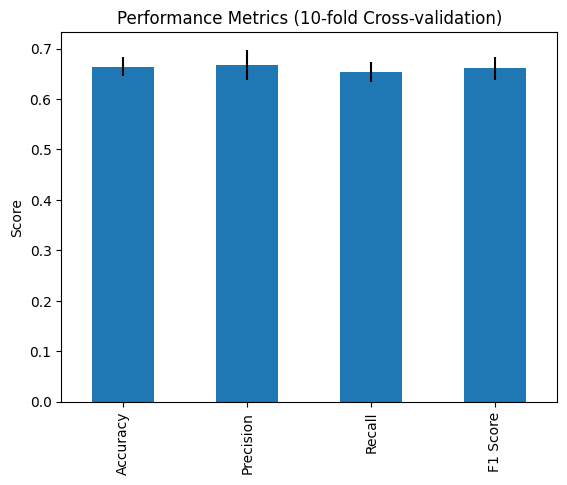

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.664315   0.667717   0.653593   0.660465
std     0.019547   0.029813   0.019187   0.023178
min     0.638105   0.621118   0.631579   0.626305
25%     0.653982   0.653720   0.638071   0.647389
50%     0.662298   0.661015   0.648221   0.653687
75%     0.672379   0.686345   0.665077   0.671282
max     0.699597   0.723014   0.686654   0.704365


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to convert sequence to one-hot encoding
def one_hot_encode(sequence):
  amino_acids = 'ARNDCEQGHILKMFPSTWYV'

  # Create a dictionary for mapping amino acids into vectors
  mapping = {aa:[int(i == aa) for i in amino_acids] for aa in amino_acids}

  # Encode the sequences
  return np.array([mapping.get(aa, [0]*20) for aa in sequence])

# Apply one-hot encoding to the sequences
balanced_df['encoded'] = balanced_df['sequence'].apply(one_hot_encode)

# Flatten each encoded sequence into a 1D array
balanced_df['flattened'] = balanced_df['encoded'].apply(lambda x: [item for sublist in x for item in sublist])

# Prepare data for SVM
X = np.array(balanced_df['flattened'].tolist())
y = balanced_df['label'].values

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy, precision, recall, f1 = [], [], [], []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the SVM model
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    # Predictions and performance metrics
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plotting bar-charts for the metrics
summary_df.mean().plot(kind='bar', yerr=summary_df.std())
plt.title('Performance Metrics (10-fold Cross-validation)')
plt.ylabel('Score')
plt.show()

# Print the summary table
print(summary_df.describe())


### SVM

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix

# # Load the CSV file
# df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/One_hot.csv')

# # Split the data into features (X) and labels (y)
# X = df.drop('label', axis=1)
# y = df['label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the SVM classifier
# svm_classifier = SVC(kernel='linear')  # You can change the kernel and other parameters

# # Train the classifier
# svm_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test)

# # Evaluate the classifier
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [6]:
import pandas as pd

# Load Dataset
ONE_pos = pd.read_csv('/content/onehot_pos.csv')
ONE_neg = pd.read_csv('/content/onehot_neg.csv')

# Check if 'label' column is present in the datasets
if 'label' not in ONE_pos.columns or 'label' not in ONE_neg.columns:
    raise ValueError("The 'label' column is missing in one or both of the datasets.")

# Confirm the number of Positive and Negative Dataset
num_pos = len(ONE_pos)
num_neg = len(ONE_neg)

# If Negative Data is more than Positive, do sampling
if num_neg > num_pos:
    # Randomly sample the same number of negative examples as positive examples
    ONE_neg_sampled = ONE_neg.sample(n=num_pos, random_state=42)  # Use a fixed random_state for reproducibility
else:
    ONE_neg_sampled = ONE_neg

# Combine the datasets
combined_data = pd.concat([ONE_pos, ONE_neg_sampled])

# Drop the first two columns which are not features (Unnamed: 0 and #)
combined_data = combined_data.iloc[:, 2:]

# Check if 'label' column is present in the combined dataset
if 'label' not in combined_data.columns:
    raise ValueError("The 'label' column is missing in the combined dataset.")

# Extract features and labels
X = combined_data.drop('label', axis=1)
y = combined_data['label']


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import numpy as np


In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

In [ ]:
# Probability of the predicting validation data
y_val_pred_proba = svm_model.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)


In [ ]:
# Probability of the predicting validation data
y_val_pred_proba = svm_model.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, confusion_matrix

# Predict on the testing data
y_test_pred = svm_model.predict(X_test_scaled)
y_test_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR and TPR
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate the accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate the F1 score
f1_score_test = f1_score(y_test, y_test_pred)

# Calculate the confusion matrix and the sensitivity, specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity_test = tp / (tp + fn)
specificity_test = tn / (tn + fp)

# Matthews Correlation
mcc_test = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Print the Result
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("MCC:", mcc_test)
print("ROC AUC:", roc_auc_test)


### KNN

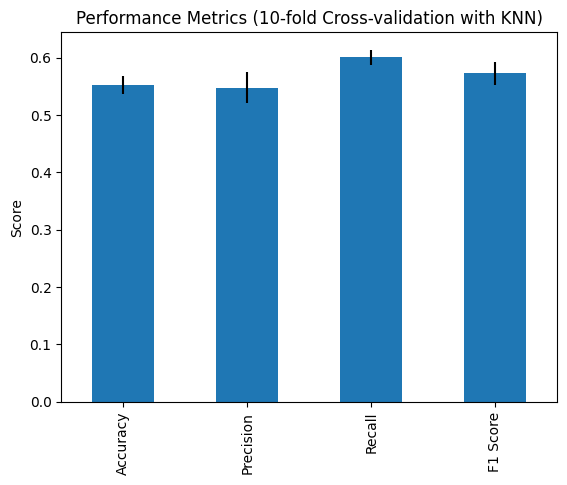

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.552117   0.547527   0.600944   0.572823
std     0.015333   0.026924   0.013093   0.019432
min     0.528226   0.506422   0.581053   0.541176
25%     0.544859   0.531968   0.595054   0.559877
50%     0.552923   0.546338   0.598633   0.570212
75%     0.558468   0.561597   0.604763   0.583652
max     0.584677   0.598499   0.626482   0.607619


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy, precision, recall, f1 = [], [], [], []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the KNN model
    model = KNeighborsClassifier(n_neighbors=5) # You can experiment with different values for n_neighbors
    model.fit(X_train, y_train)

    # Predictions and performance metrics
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plotting bar-charts for the metrics
summary_df.mean().plot(kind='bar', yerr=summary_df.std())
plt.title('Performance Metrics (10-fold Cross-validation with KNN)')
plt.ylabel('Score')
plt.show()

# Print the summary table
print(summary_df.describe())

### Decision Tree

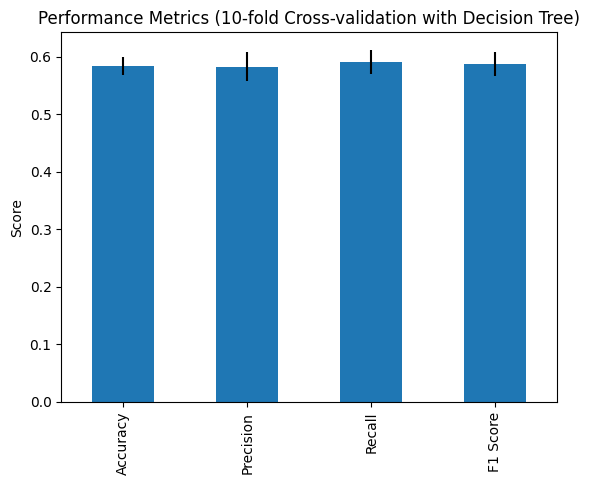

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.584073   0.582686   0.591455   0.586881
std     0.015444   0.025494   0.020738   0.020865
min     0.562500   0.541414   0.564211   0.552577
25%     0.571825   0.563866   0.572449   0.571865
50%     0.582157   0.582313   0.595938   0.590530
75%     0.598286   0.600822   0.607401   0.603491
max     0.605847   0.624490   0.621094   0.610236


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy, precision, recall, f1 = [], [], [], []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Predictions and performance metrics
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plotting bar-charts for the metrics
summary_df.mean().plot(kind='bar', yerr=summary_df.std())
plt.title('Performance Metrics (10-fold Cross-validation with Decision Tree)')
plt.ylabel('Score')
plt.show()

# Print the summary table
print(summary_df.describe())

### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

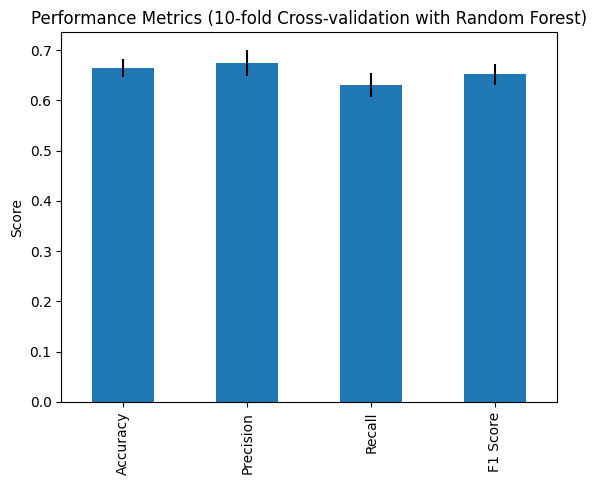

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.663609   0.674993   0.630971   0.652027
std     0.017926   0.025714   0.023306   0.021136
min     0.640121   0.635193   0.582822   0.618221
25%     0.648185   0.661873   0.624595   0.636052
50%     0.664315   0.670641   0.634956   0.654533
75%     0.678175   0.680871   0.646870   0.660675
max     0.689516   0.721739   0.656805   0.683778


In [ ]:
# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy, precision, recall, f1 = [], [], [], []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100)  # 可以调整n_estimators参数
    model.fit(X_train, y_train)

    # Predictions and performance metrics
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plotting bar-charts for the metrics
summary_df.mean().plot(kind='bar', yerr=summary_df.std())
plt.title('Performance Metrics (10-fold Cross-validation with Random Forest)')
plt.ylabel('Score')
plt.show()

# Print the summary table
print(summary_df.describe())

### Bayesian Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

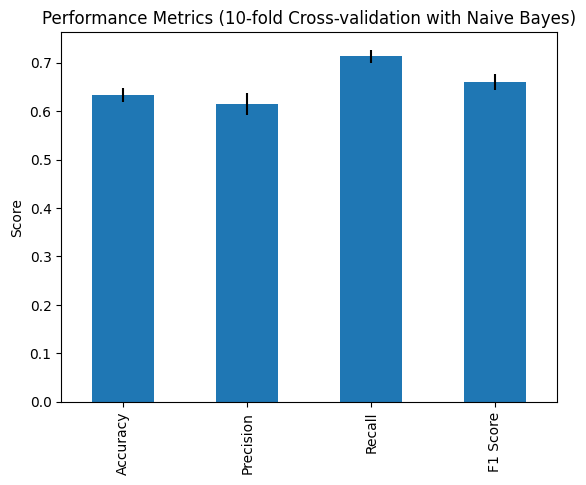

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.633165   0.614687   0.712941   0.660083
std     0.014604   0.021898   0.013589   0.017330
min     0.620968   0.586387   0.693582   0.640535
25%     0.621976   0.596183   0.707116   0.647777
50%     0.627016   0.614470   0.711200   0.658458
75%     0.641885   0.629417   0.716701   0.668329
max     0.664315   0.656997   0.744681   0.698096


In [ ]:
# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy, precision, recall, f1 = [], [], [], []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predictions and performance metrics
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Plotting bar-charts for the metrics
summary_df.mean().plot(kind='bar', yerr=summary_df.std())
plt.title('Performance Metrics (10-fold Cross-validation with Naive Bayes)')
plt.ylabel('Score')
plt.show()

# Print the summary table
print(summary_df.describe())

## AAC

### KNN

In [ ]:
import pandas as pd

# Load Dataset
AAC_pos = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_pos.csv')
AAC_neg = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_neg.csv')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
import numpy as np

# Randomly sample the negative dataset to match the number of positive samples
num_pos_samples = len(AAC_pos)
neg_data_sampled = AAC_neg.sample(n=num_pos_samples, random_state=42)

# Combining the datasets
combined_data = pd.concat([AAC_pos, neg_data_sampled])

# Creating labels (1 for positive, 0 for negative)
labels = np.array([1] * num_pos_samples + [0] * num_pos_samples)

# Extracting features
features = combined_data.iloc[:, 2:].values  # Assuming first two columns are not features

# K-Fold Cross-Validation setup
k = 10  # Using 10 folds as per the requirement
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Performance metrics
accuracies = cross_val_score(knn, features, labels, cv=cv, scoring='accuracy')
sensitivity = []
specificity = []
mcc_scores = []

for train_index, test_index in cv.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    sensitivity_score = tp / (tp + fn)
    specificity_score = tn / (tn + fp)
    mcc_score = matthews_corrcoef(y_test, predictions)

    sensitivity.append(sensitivity_score)
    specificity.append(specificity_score)
    mcc_scores.append(mcc_score)

# Calculating average scores
avg_accuracy = np.mean(accuracies)
avg_sensitivity = np.mean(sensitivity)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc_scores)

avg_accuracy, avg_sensitivity, avg_specificity, avg_mcc


(0.5787298387096774,
 0.6699596774193549,
 0.48749999999999993,
 0.1603162313120567)

### SVM (no sampling before)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

AAC_pos = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_pos.csv")
AAC_neg = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/AAC_neg.csv")

# Preprocessing: Combine datasets and create labels
AAC_pos['label'] = 1  # Positive samples
AAC_neg['label'] = 0  # Negative samples
combined_data = pd.concat([AAC_pos, AAC_neg], ignore_index=True)

# Dropping the first two columns which are not features (Unnamed: 0 and #)
combined_data = combined_data.drop(columns=combined_data.columns[:2])

# Extract features and labels
X = combined_data.drop('label', axis=1)
y = combined_data['label']



In [ ]:
# Setting up k-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Metrics storage
accuracies = []
mccs = []
sensitivities = []
specificities = []

# K-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predictions
    y_pred = svm_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics
    accuracies.append(acc)
    mccs.append(mcc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Calculating the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_mcc = np.mean(mccs)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)

avg_accuracy, avg_mcc, avg_sensitivity, avg_specificity



In [ ]:
# Re-examining the code to identify and correct the issue

# Ensuring that the data has no missing values or inconsistencies
print("Missing values in the dataset:", combined_data.isnull().sum().sum())

# Re-running the cross-validation process with error handling to identify the issue
try:
    # Resetting the metrics storage
    accuracies = []
    mccs = []
    sensitivities = []
    specificities = []

    # K-fold cross-validation with error handling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        svm_model.fit(X_train, y_train)

        # Predictions
        y_pred = svm_model.predict(X_test)

        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Store metrics
        accuracies.append(acc)
        mccs.append(mcc)
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Calculating the average of the metrics
    avg_accuracy = np.mean(accuracies)
    avg_mcc = np.mean(mccs)
    avg_sensitivity = np.mean(sensitivities)
    avg_specificity = np.mean(specificities)

    avg_accuracy, avg_mcc, avg_sensitivity, avg_specificity
except Exception as e:
    error_message = str(e)
    error_message
except:
    error_message = "An unknown error occurred."
    error_message



### SVM

In [ ]:
import pandas as pd

# Load Dataset
# AAC_pos = pd.read_csv('path_to_pos_data.csv')
# AAC_neg = pd.read_csv('path_to_neg_data.csv')

# Confirm the number of Positive Negative Dataset Negative Dataset
num_pos = len(AAC_pos)
num_neg = len(AAC_neg)

# If Negative Data is more than Positive, do sampling
if num_neg > num_pos:
    AAC_neg_sampled = AAC_neg.sample(n=num_pos)  # 隨機選取與正例相同數量的負例
else:
    AAC_neg_sampled = AAC_neg

# Combined _data
combined_data = pd.concat([AAC_pos, AAC_neg_sampled])

# Dropping the first two columns which are not features (Unnamed: 0 and #)
combined_data = combined_data.drop(columns=combined_data.columns[:2])

# Extract features and labels
X = combined_data.drop('label', axis=1)
y = combined_data['label']


In [ ]:

# Setting up k-fold cross-validation
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Metrics storage
accuracies = []
mccs = []
sensitivities = []
specificities = []

# K-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    svm_model.fit(X_train, y_train)

    # Predictions
    y_pred = svm_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics
    accuracies.append(acc)
    mccs.append(mcc)
    sensitivities.append(sensitivity)
    specificities.append(specificity)

# Calculating the average of the metrics
avg_accuracy = np.mean(accuracies)
avg_mcc = np.mean(mccs)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)

avg_accuracy, avg_mcc, avg_sensitivity, avg_specificity

(0.6391129032258065,
 0.27834150151721426,
 0.632258064516129,
 0.6459677419354839)

In [ ]:
# Re-examining the code to identify and correct the issue

# Ensuring that the data has no missing values or inconsistencies
print("Missing values in the dataset:", combined_data.isnull().sum().sum())

# Re-running the cross-validation process with error handling to identify the issue
try:
    # Resetting the metrics storage
    accuracies = []
    mccs = []
    sensitivities = []
    specificities = []

    # K-fold cross-validation with error handling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        svm_model.fit(X_train, y_train)

        # Predictions
        y_pred = svm_model.predict(X_test)

        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        # Store metrics
        accuracies.append(acc)
        mccs.append(mcc)
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Calculating the average of the metrics
    avg_accuracy = np.mean(accuracies)
    avg_mcc = np.mean(mccs)
    avg_sensitivity = np.mean(sensitivities)
    avg_specificity = np.mean(specificities)

    avg_accuracy, avg_mcc, avg_sensitivity, avg_specificity
except Exception as e:
    error_message = str(e)
    error_message
except:
    error_message = "An unknown error occurred."
    error_message



Missing values in the dataset: 0


### Decision Tree

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
import numpy as np

# Dropping the first two columns which are not features (Unnamed: 0 and #)
combined_data = combined_data.drop(columns=combined_data.columns[:2])


# Setup for Stratified K-Fold Cross-Validation
k = 10  # Example value for k
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Arrays to store performance metrics
accuracies = []
sensitivities = []
specificities = []
mcc_scores = []

# K-Fold Cross-Validation with a Decision Tree Classifier
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Decision Tree Classifier with class weight adjustment
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculating the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Storing the results
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    mcc_scores.append(mcc)

# Averaging the performance metrics across all folds
avg_accuracy = np.mean(accuracies)
avg_sensitivity = np.mean(sensitivities)
avg_specificity = np.mean(specificities)
avg_mcc = np.mean(mcc_scores)

avg_accuracy, avg_sensitivity, avg_specificity, avg_mcc


(0.5649193548387096,
 0.5671370967741935,
 0.5627016129032258,
 0.12986940687406467)

Method 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Since we don't have the actual datasets, I'll use the previously combined and cleaned dataset
# and perform the sampling as described in the provided code snippet

# Sampling negative data to match the number of positive data
num_pos = combined_data[combined_data['label'] == 1].shape[0]
num_neg = combined_data[combined_data['label'] == 0].shape[0]

if num_neg > num_pos:
    AAC_neg_sampled = combined_data[combined_data['label'] == 0].sample(n=num_pos, random_state=42)
else:
    AAC_neg_sampled = combined_data[combined_data['label'] == 0]

# Combining sampled data
combined_data_sampled = pd.concat([combined_data[combined_data['label'] == 1], AAC_neg_sampled])

# Splitting into features and labels
X_sampled = combined_data_sampled.drop('label', axis=1)
y_sampled = combined_data_sampled['label']

# Setup for Stratified K-Fold Cross-Validation
k = 10
skf_sampled = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Decision Tree Classifier (replacing SVM from the provided code)
dt_model = DecisionTreeClassifier(random_state=42)

# Arrays to store performance metrics for the sampled data
accuracies_sampled = []
mccs_sampled = []
sensitivities_sampled = []
specificities_sampled = []

# K-Fold Cross-Validation
for train_index, test_index in skf_sampled.split(X_sampled, y_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    # Train the model
    dt_model.fit(X_train, y_train)

    # Predictions
    y_pred = dt_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics
    accuracies_sampled.append(acc)
    mccs_sampled.append(mcc)
    sensitivities_sampled.append(sensitivity)
    specificities_sampled.append(specificity)

# Calculating the average of the metrics
avg_accuracy_sampled = np.mean(accuracies_sampled)
avg_mcc_sampled = np.mean(mccs_sampled)
avg_sensitivity_sampled = np.mean(sensitivities_sampled)
avg_specificity_sampled = np.mean(specificities_sampled)

avg_accuracy_sampled, avg_sensitivity_sampled, avg_specificity_sampled, avg_mcc_sampled


(0.5684475806451613,
 0.5685483870967742,
 0.5683467741935485,
 0.1369524463032139)

### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Redefining the model as Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Resetting the arrays for performance metrics for Random Forest
accuracies_rf = []
mccs_rf = []
sensitivities_rf = []
specificities_rf = []

# Repeating the K-Fold Cross-Validation with Random Forest
for train_index, test_index in skf_sampled.split(X_sampled, y_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics
    accuracies_rf.append(acc)
    mccs_rf.append(mcc)
    sensitivities_rf.append(sensitivity)
    specificities_rf.append(specificity)

# Calculating the average of the metrics for Random Forest
avg_accuracy_rf = np.mean(accuracies_rf)
avg_mcc_rf = np.mean(mccs_rf)
avg_sensitivity_rf = np.mean(sensitivities_rf)
avg_specificity_rf = np.mean(specificities_rf)

avg_accuracy_rf, avg_mcc_rf, avg_sensitivity_rf, avg_specificity_rf


(0.6350806451612904,
 0.27109790690318264,
 0.6747983870967742,
 0.5953629032258065)

### Bayesian Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Redefining the model as Gaussian Naive Bayes
gnb_model = GaussianNB()

# Resetting the arrays for performance metrics for Gaussian Naive Bayes
accuracies_gnb = []
mccs_gnb = []
sensitivities_gnb = []
specificities_gnb = []

# Repeating the K-Fold Cross-Validation with Gaussian Naive Bayes
for train_index, test_index in skf_sampled.split(X_sampled, y_sampled):
    X_train, X_test = X_sampled.iloc[train_index], X_sampled.iloc[test_index]
    y_train, y_test = y_sampled.iloc[train_index], y_sampled.iloc[test_index]

    # Train the model
    gnb_model.fit(X_train, y_train)

    # Predictions
    y_pred = gnb_model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store metrics
    accuracies_gnb.append(acc)
    mccs_gnb.append(mcc)
    sensitivities_gnb.append(sensitivity)
    specificities_gnb.append(specificity)

# Calculating the average of the metrics for Gaussian Naive Bayes
avg_accuracy_gnb = np.mean(accuracies_gnb)
avg_mcc_gnb = np.mean(mccs_gnb)
avg_sensitivity_gnb = np.mean(sensitivities_gnb)
avg_specificity_gnb = np.mean(specificities_gnb)

avg_accuracy_gnb, avg_mcc_gnb, avg_sensitivity_gnb, avg_specificity_gnb


(0.6227822580645161, 0.2458401845026359, 0.6423387096774194, 0.603225806451613)

## EAAC

In [ ]:
pip install tqdm


### SVM

不知為何，跑了超級久 (先做 Normalize )

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef

# # Load Data
# neg_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv')
# pos_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv')

# # If there is any non-integer column, remove it
# neg_df = neg_df.select_dtypes(include=[np.number])
# pos_df = pos_df.select_dtypes(include=[np.number])

# # Add 'label' Column
# neg_df['label'] = 0
# pos_df['label'] = 1

# # Data balancing and preparation
# min_samples = min(len(neg_df), len(pos_df))
# balanced_neg = neg_df.sample(n=min_samples, random_state=1)
# balanced_pos = pos_df.sample(n=min_samples, random_state=1)
# balanced_df = pd.concat([balanced_neg, balanced_pos])

# X = balanced_df.drop(columns=['label']).values
# y = balanced_df['label'].values

# # 10-fold cross validation
# kf = KFold(n_splits=10, shuffle=True, random_state=1)
# sensitivity, specificity, accuracy, mcc = [], [], [], []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # SVM Model
#     model = SVC(kernel='linear')
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Evaluation
#     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#     sensitivity.append(tp / (tp + fn))
#     specificity.append(tn / (tn + fp))
#     accuracy.append(accuracy_score(y_test, y_pred))
#     mcc.append(matthews_corrcoef(y_test, y_pred))

# # Performance Index
# performance_df = pd.DataFrame({
#     'Sensitivity': sensitivity,
#     'Specificity': specificity,
#     'Accuracy': accuracy,
#     'MCC': mcc
# })

# # Performance Description
# print(performance_df.describe())


載入數據

In [ ]:
import pandas as pd

# Load the provided data files
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
file_path_pos = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv'

negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Display the first few rows of each dataset for review
negative_data_head = negative_data.head()
positive_data_head = positive_data.head()

negative_data_head, positive_data_head


(   Unnamed: 0       #  SW.1.A  SW.1.C  SW.1.D  SW.1.E  SW.1.F  SW.1.G  SW.1.H  \
 0           0  Q2RBM4     0.0     0.0     0.0     0.2     0.0     0.0     0.0   
 1           1  Q2RBM4     0.0     0.0     0.2     0.0     0.0     0.0     0.2   
 2           2  Q2RBM4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3           3  Q2RBM4     0.0     0.0     0.0     0.0     0.2     0.0     0.0   
 4           4  Q2RBM4     0.0     0.2     0.2     0.0     0.2     0.0     0.0   
 
    SW.1.I  ...  SW.27.M  SW.27.N  SW.27.P  SW.27.Q  SW.27.R  SW.27.S  SW.27.T  \
 0     0.0  ...      0.2      0.2      0.0      0.0      0.0      0.0      0.2   
 1     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 2     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 3     0.0  ...      0.0      0.0      0.4      0.2      0.0      0.0      0.0   
 4     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    SW.27.V 

用肘部圖決定群數

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

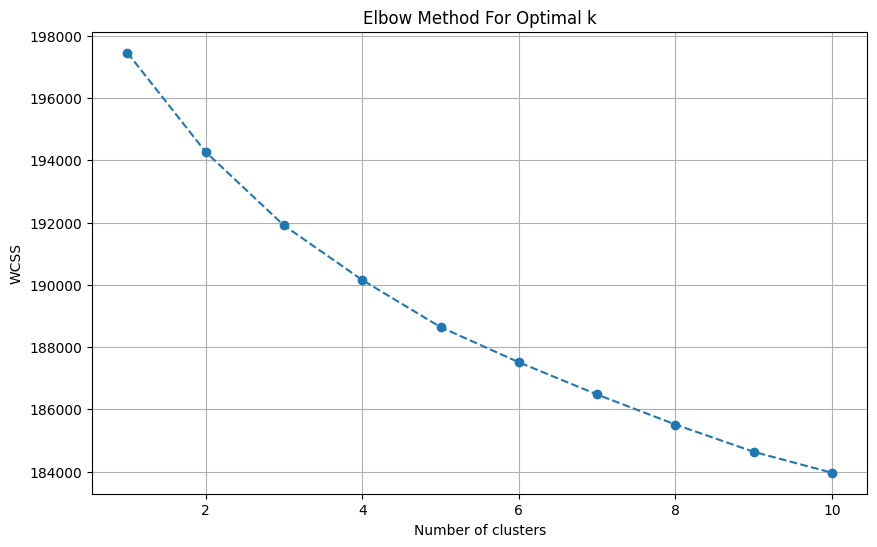

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Removing non-numeric columns
# negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])

# # Using the Elbow Method to find the optimal number of clusters
# wcss = []  # Within-cluster sum of squares
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(negative_data_numeric)
#     wcss.append(kmeans.inertia_)

# # Plotting the results onto a line graph to observe the 'elbow'
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.grid(True)
# plt.show()


先降維再用肘部圖決定群數

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

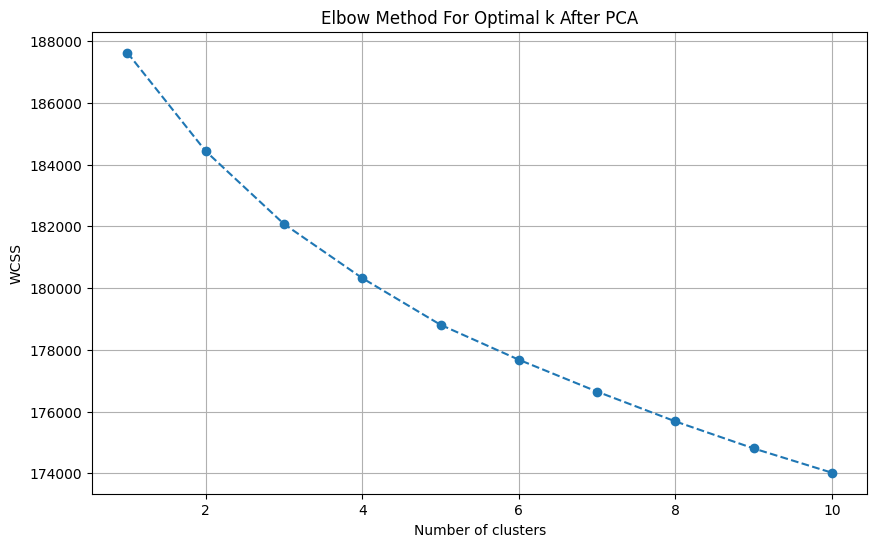

(220,
 [187625.1924673767,
  184436.5306883815,
  182075.9687603974,
  180322.6184579278,
  178810.23227599866,
  177678.53325090843,
  176645.18354621038,
  175679.6583563054,
  174803.3430488619,
  174016.59586768775])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the data
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
negative_data = pd.read_csv(file_path_neg)
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
negative_data_pca = pca.fit_transform(negative_data_numeric)

# Number of components PCA chose
num_components = pca.n_components_

# Reapplying the Elbow Method with reduced dimensions
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(negative_data_pca)
    wcss_pca.append(kmeans_pca.inertia_)

# Plotting the results of Elbow Method after PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k After PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

num_components, wcss_pca


上面的解釋：

1. 220: 這是 PCA 選擇的主成分數量，意味著原始數據被降維到 220 個主成分，這些主成分保留了原始數據 95% 的變異性。

2. WCSS 值的列表：這個列表中的每個數字對應於不同的群數 (從 1 到 10) 下的 WCSS 值。例如，當群數為 1 時，WCSS 值為 187625.19；群數為 2 時，WCSS 值為 184436.53；以此類推。

In [ ]:
# Reloading necessary libraries and data due to the reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Reload the data
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
file_path_pos = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv'
negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Removing non-numeric columns
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])


應用 PCA 和 K-means 分群

In [ ]:
pca = PCA(n_components=0.95)
negative_data_pca = pca.fit_transform(negative_data_numeric)
kmeans = KMeans(n_clusters=10, random_state=42)
negative_data_clusters = kmeans.fit_predict(negative_data_pca)
negative_data['Cluster'] = negative_data_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


平衡數據集

In [ ]:
samples_per_cluster = len(positive_data) // 10
balanced_neg_data = negative_data.groupby('Cluster').apply(lambda x: x.sample(n=samples_per_cluster, random_state=42)).reset_index(drop=True)
combined_data = pd.concat([positive_data, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(positive_data) else 0 for i in range(len(combined_data))]


In [ ]:
len(combined_data)

拆分數據集

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


訓練 SVM 模型

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, probability = True)
svm_model.fit(X_train_scaled, y_train)
# 在驗證集和測試集上評估模型效果


評估指標：準確率、召回率、精確率以及 F1 分數

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 在驗證集上進行預測
y_val_pred = svm_model.predict(X_val_scaled)

# 計算並顯示驗證集的性能指標
print("Validation Set Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# 在測試集上進行預測
y_test_pred = svm_model.predict(X_test_scaled)

# 計算並顯示測試集的性能指標
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Validation Set Performance:
Accuracy: 0.6955645161290323
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       495
           1       0.71      0.65      0.68       497

    accuracy                           0.70       992
   macro avg       0.70      0.70      0.70       992
weighted avg       0.70      0.70      0.70       992

Confusion Matrix:
 [[365 130]
 [172 325]]

Test Set Performance:
Accuracy: 0.6582661290322581
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       481
           1       0.68      0.64      0.66       511

    accuracy                           0.66       992
   macro avg       0.66      0.66      0.66       992
weighted avg       0.66      0.66      0.66       992

Confusion Matrix:
 [[324 157]
 [182 329]]


上面的解釋：

真負例 (TN)：365

假正例 (FP)：130

假負例 (FN)：172

真正例 (TP)：325

10-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# 10 Fold Cross Validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)

# Print the result of 10 Fold Cross Validation
print("\nCross Validation Scores (10 folds):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross Validation Scores (10 folds): [0.70403023 0.7115869  0.67632242 0.71788413 0.67632242 0.69521411
 0.70113493 0.6998739  0.70491803 0.68600252]
Mean CV Accuracy: 0.6973289583604652


額外的性能指標需要自己寫

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import numpy as np


In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

In [ ]:
# Probability of the predicting validation data
y_val_pred_proba = svm_model.predict_proba(X_val_scaled)[:, 1]

# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc_val = auc(fpr_val, tpr_val)


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, confusion_matrix

# Predict on the testing data
y_test_pred = svm_model.predict(X_test_scaled)
y_test_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR and TPR
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate the accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate the F1 score
f1_score_test = f1_score(y_test, y_test_pred)

# Calculate the confusion matrix and the sensitivity, specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity_test = tp / (tp + fn)
specificity_test = tn / (tn + fp)

# Matthews Correlation
mcc_test = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Print the Result
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_score_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)
print("MCC:", mcc_test)
print("ROC AUC:", roc_auc_test)


Accuracy: 0.6582661290322581
F1 Score: 0.6599799398194583
Sensitivity: 0.6438356164383562
Specificity: 0.6735966735966736
MCC: 0.31735160378487526
ROC AUC: 0.7142694402968376


#### ROC curve

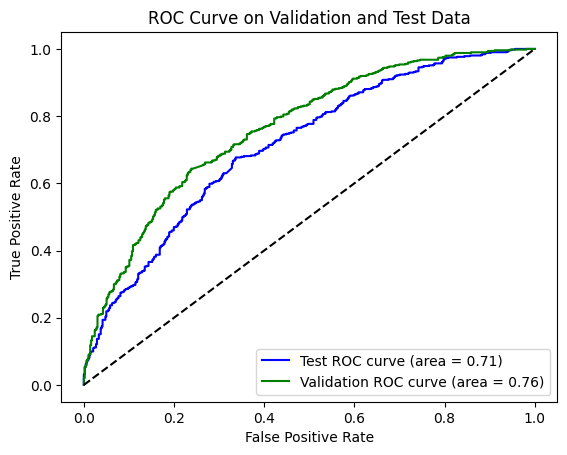

In [ ]:
plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')

# 绘制验证集的 ROC 曲线
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='green')

# 绘制随机分类的基线
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


沒有經過 Cross Validation

Validation Set - Sensitivity: 0.6539235412474849
Validation Set - Specificity: 0.7373737373737373

Test Set - Sensitivity: 0.6438356164383562
Test Set - Specificity: 0.6735966735966736


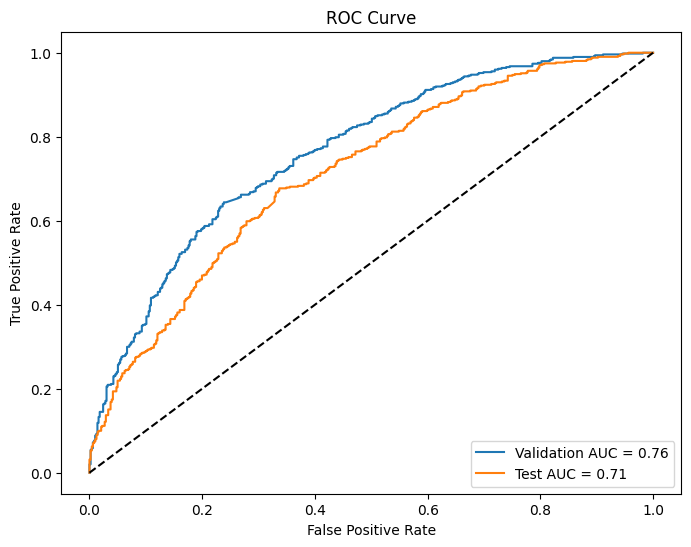

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# 計算驗證集的靈敏度和特異性
sensitivity_val, specificity_val = calculate_sensitivity_specificity(y_val, y_val_pred)
print("Validation Set - Sensitivity:", sensitivity_val)
print("Validation Set - Specificity:", specificity_val)

# 計算測試集的靈敏度和特異性
sensitivity_test, specificity_test = calculate_sensitivity_specificity(y_test, y_test_pred)
print("\nTest Set - Sensitivity:", sensitivity_test)
print("Test Set - Specificity:", specificity_test)

# 繪製 ROC 曲線和計算 AUC
y_val_proba = svm_model.predict_proba(X_val_scaled)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_val = auc(fpr_val, tpr_val)

y_test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = auc(fpr_test, tpr_test)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


再加入 MCC

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Cal MCC of Validating Set
mcc_val = matthews_corrcoef(y_val, y_val_pred)
print("Validation Set - MCC:", mcc_val)

# Cal MCC of testing Set
mcc_test = matthews_corrcoef(y_test, y_test_pred)
print("Test Set - MCC:", mcc_test)


Validation Set - MCC: 0.39264021617211825
Test Set - MCC: 0.31735160378487526


### Decision Tree

導入 Decision Tree 的 Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, matthews_corrcoef

# Make predictions
y_val_pred = decision_tree_model.predict(X_val_scaled)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, decision_tree_model.predict_proba(X_val_scaled)[:, 1])
mcc = matthews_corrcoef(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation ROC-AUC: {roc_auc}")
print(f"Validation MCC: {mcc}")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.6129032258064516
Validation ROC-AUC: 0.6117106680486963
Validation MCC: 0.22605005347577192
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       495
           1       0.62      0.59      0.61       497

    accuracy                           0.61       992
   macro avg       0.61      0.61      0.61       992
weighted avg       0.61      0.61      0.61       992



### Random Forest

導入 Random Forest 模型

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initiate Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Model
random_forest_model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

對 validation set 和 test set 進行預測

In [ ]:
y_val_pred = random_forest_model.predict(X_val_scaled)
y_test_pred = random_forest_model.predict(X_test_scaled)


計算性能指標

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')


Validation - Sensitivity: 0.7122736418511066, Specificity: 0.7111111111111111, Accuracy: 0.7116935483870968, MCC: 0.4233847529622177, F1 Score: 0.7122736418511065


#### ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Assuming random_forest_model is your Random Forest model
# Predictions for validation set
y_val_pred = random_forest_model.predict(X_val_scaled)
sensitivity_val, specificity_val = calculate_sensitivity_specificity(y_val, y_val_pred)
print("Validation Set - Sensitivity:", sensitivity_val)
print("Validation Set - Specificity:", specificity_val)

# Predictions for test set
y_test_pred = random_forest_model.predict(X_test_scaled)
sensitivity_test, specificity_test = calculate_sensitivity_specificity(y_test, y_test_pred)
print("\nTest Set - Sensitivity:", sensitivity_test)
print("Test Set - Specificity:", specificity_test)

# ROC Curve and AUC for validation set
y_val_proba = random_forest_model.predict_proba(X_val_scaled)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_val = auc(fpr_val, tpr_val)

# ROC Curve and AUC for test set
y_test_proba = random_forest_model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = auc(fpr_test, tpr_test)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


NameError: ignored

### XGBOOST + Grid Search / CV =3

In [ ]:
pip install xgboost


導入 XGBOOST 和 Grid Search

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Define Parameters

In [ ]:
# Dfine Grid Parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters here
}


In [ ]:
# Initiate XGBOOST Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2)


Perform GridSearch

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   7.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   6.1s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=6, n_es

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

Print Best Parameters

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


對 validation set 和 test set 進行預測

In [ ]:
y_val_pred = grid_search.predict(X_val_scaled)
y_val_proba = grid_search.predict_proba(X_val_scaled)[:, 1]
y_test_proba = grid_search.predict_proba(X_test_scaled)[:, 1]

評估模型效能

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')


Validation - 
Sensitivity: 0.6841046277665996
Specificity: 0.7474747474747475
Accuracy: 0.7157258064516129
MCC: 0.43242390243608597
F1 Score: 0.7068607068607069


#### ROC Curve

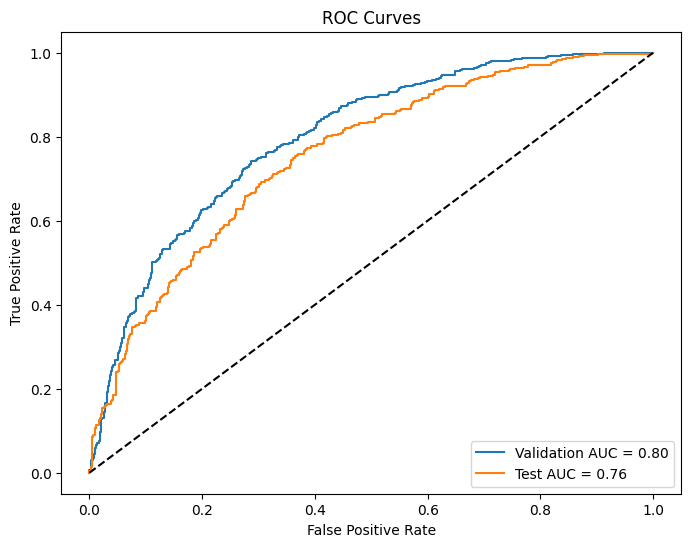

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = auc(fpr_test, tpr_test)

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

### XGBOOST + Grid Search / CV=10

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [ ]:
# Dfine Grid Parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters here
}


In [ ]:
# Initiate XGBOOST Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=10, verbose=2)


Perform GridSearch

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

Print Best Parameters

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


對 validation set 和 test set 進行預測

In [ ]:
y_val_pred = grid_search.predict(X_val_scaled)
y_val_proba = grid_search.predict_proba(X_val_scaled)[:, 1]
y_test_proba = grid_search.predict_proba(X_test_scaled)[:, 1]

評估模型效能

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')


Validation -
Sensitivity: 0.6921529175050302
Specificity: 0.7191919191919192
Accuracy: 0.7056451612903226
MCC: 0.4114853593201268
F1 Score: 0.7020408163265306


### XGBOOST + Random Search

Import Packages

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


Define Parameter

In [ ]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
    # Add other parameters
}

Initiate XGBOOST Classifier

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

Initiate RandomSearchCV

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=25, scoring='accuracy', cv=10, verbose=2, random_state=42)


Fit Random Model

In [ ]:
random_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=  14.0s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=  16.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=  15.0s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   5.2s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   8.8s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   5.2s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   8.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, su

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ed1633ad540>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ed15ec97be0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ed15ec94880>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ed15ec95630>},
                   random_state=42, scoring='accuracy', verbose=2)

Best Parameters

In [ ]:
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'learning_rate': 0.019333132642723086, 'max_depth': 6, 'n_estimators': 370, 'subsample': 0.728034992108518}


Predict the Model

In [ ]:
y_val_pred = random_search.predict(X_val_scaled)
y_val_proba = random_search.predict_proba(X_val_scaled)[:, 1]

In [ ]:
y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

Evaluate the Model

Validation - Sensitivity: 0.7022132796780685, Specificity: 0.7434343434343434, Accuracy: 0.7227822580645161, MCC: 0.4460094506121016, F1 Score: 0.7173689619732786
Test - Sensitivity: 0.7045009784735812, Specificity: 0.6694386694386695, Accuracy: 0.6875, MCC: 0.3741711112512933, F1 Score: 0.6990291262135921


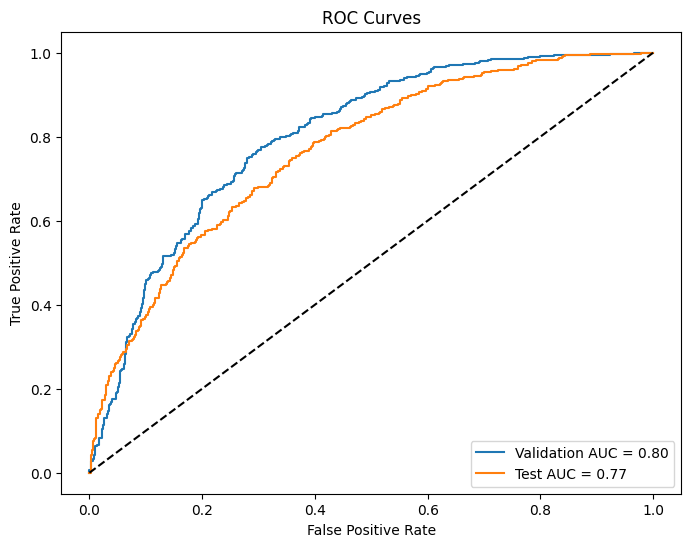

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for test set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
      f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

# Print test metrics
print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
      f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')

# Calculate ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagnol
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


### SVM-Fisher Model (CANNOT BE USED)

Load Data

In [ ]:
import pandas as pd

# Load the provided data files
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
file_path_pos = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv'

negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Display the first few rows of each dataset for review
negative_data_head = negative_data.head()
positive_data_head = positive_data.head()

negative_data_head, positive_data_head


(   Unnamed: 0       #  SW.1.A  SW.1.C  SW.1.D  SW.1.E  SW.1.F  SW.1.G  SW.1.H  \
 0           0  Q2RBM4     0.0     0.0     0.0     0.2     0.0     0.0     0.0   
 1           1  Q2RBM4     0.0     0.0     0.2     0.0     0.0     0.0     0.2   
 2           2  Q2RBM4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3           3  Q2RBM4     0.0     0.0     0.0     0.0     0.2     0.0     0.0   
 4           4  Q2RBM4     0.0     0.2     0.2     0.0     0.2     0.0     0.0   
 
    SW.1.I  ...  SW.27.M  SW.27.N  SW.27.P  SW.27.Q  SW.27.R  SW.27.S  SW.27.T  \
 0     0.0  ...      0.2      0.2      0.0      0.0      0.0      0.0      0.2   
 1     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 2     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 3     0.0  ...      0.0      0.0      0.4      0.2      0.0      0.0      0.0   
 4     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    SW.27.V 

先降維再用肘部圖決定群數

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

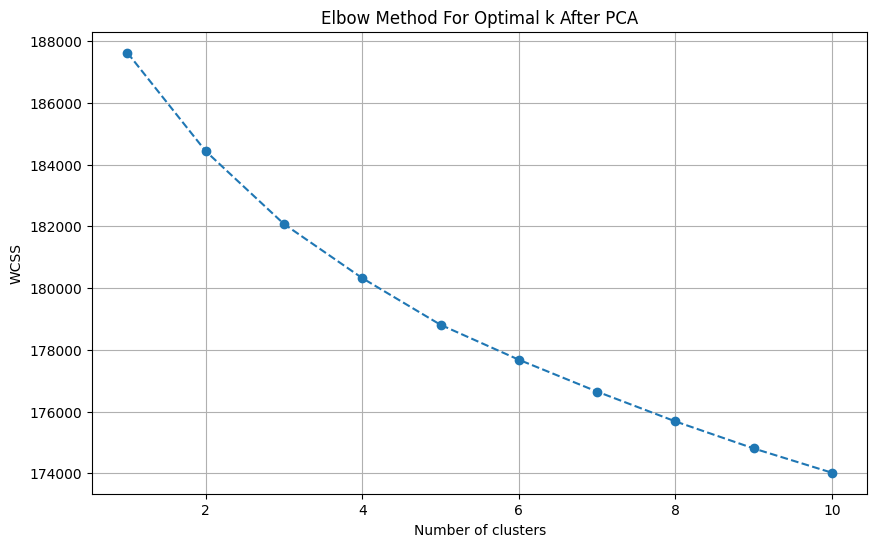

(220,
 [187625.1924673767,
  184436.5306883815,
  182075.9687603974,
  180322.6184579278,
  178810.23227599866,
  177678.53325090843,
  176645.18354621038,
  175679.6583563054,
  174803.3430488619,
  174016.59586768775])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the data
file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
negative_data = pd.read_csv(file_path_neg)
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
negative_data_pca = pca.fit_transform(negative_data_numeric)

# Number of components PCA chose
num_components = pca.n_components_

# Reapplying the Elbow Method with reduced dimensions
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(negative_data_pca)
    wcss_pca.append(kmeans_pca.inertia_)

# Plotting the results of Elbow Method after PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k After PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

num_components, wcss_pca


上面的解釋：

1. 220: 這是 PCA 選擇的主成分數量，意味著原始數據被降維到 220 個主成分，這些主成分保留了原始數據 95% 的變異性。

2. WCSS 值的列表：這個列表中的每個數字對應於不同的群數 (從 1 到 10) 下的 WCSS 值。例如，當群數為 1 時，WCSS 值為 187625.19；群數為 2 時，WCSS 值為 184436.53；以此類推。

In [ ]:
# Reloading necessary libraries and data due to the reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Reload the data
# file_path_neg = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_neg.csv'
file_path_pos = '/content/drive/MyDrive/Colab_Notebooks/BML/Ass3/EAAC_pos.csv'
negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Removing non-numeric columns
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])


應用 PCA 和 K-means 分群

In [ ]:
pca = PCA(n_components=0.95)
negative_data_pca = pca.fit_transform(negative_data_numeric)
kmeans = KMeans(n_clusters=10, random_state=42)
negative_data_clusters = kmeans.fit_predict(negative_data_pca)
negative_data['Cluster'] = negative_data_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


平衡數據集

In [ ]:
samples_per_cluster = len(positive_data) // 10
balanced_neg_data = negative_data.groupby('Cluster').apply(lambda x: x.sample(n=samples_per_cluster, random_state=42)).reset_index(drop=True)
combined_data = pd.concat([positive_data, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(positive_data) else 0 for i in range(len(combined_data))]


拆分數據集

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Import Module

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Apply FLD (Fisher Linear Descrimination)

In [ ]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


Set SVM and GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 设置 SVM 和 GridSearchCV
svm = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel Type
    'C': [0.1, 1, 10, 100]                # Regulization
    # other parameters
}
grid_search = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')


Train the Model and find the best parameters (大約50min)

In [ ]:
grid_search.fit(X_train_lda, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Use the Best Model

In [ ]:
best_model = grid_search.best_estimator_
print("valid_accuracy:", best_model.score(X_val_lda, y_val))
print("test_accuracy:", best_model.score(X_test_lda, y_test))


valid_accuracy: 0.6622983870967742
test_accuracy: 0.6169354838709677


In [ ]:
# 对验证集进行预测
y_val_pred = best_model.predict(X_val_lda)

# 对测试集进行预测
y_test_pred = best_model.predict(X_test_lda)


In [ ]:
y_val_proba = best_model.predict_proba(X_val_lda)[:, 1]
y_test_proba = best_model.predict_proba(X_test_lda)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for test set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
      f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

# Print test metrics
print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
      f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')

# Calculate ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_val = auc(fpr_val, tpr_val)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # 对比线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


Validation - Sensitivity: 0.670020120724346, Specificity: 0.6545454545454545, Accuracy: 0.6622983870967742, MCC: 0.3246071409452313, F1 Score: 0.6653346653346652
Test - Sensitivity: 0.8512720156555773, Specificity: 0.367983367983368, Accuracy: 0.6169354838709677, MCC: 0.2513916071277689, F1 Score: 0.696


NameError: ignored

對 validation set 和 test set 進行預測

In [ ]:
# Transform your validation data
X_val_lda = lda.transform(X_val_scaled)  # Make sure 'lda' is the LDA model fitted on the training data

# Predict using the best estimator from GridSearchCV
y_val_pred = grid_search.best_estimator_.predict(X_val_lda)
y_val_proba = grid_search.best_estimator_.predict_proba(X_val_lda)[:, 1]


In [ ]:
y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X_test' and 'y_test' are your test data and labels

# Step 1: Prepare the Test Data
X_test_lda = lda.transform(X_test)

# Step 2: Make Predictions
y_pred = svm_best.predict(X_test_lda)

# Step 3: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 4: Interpret the Results
# (Your interpretation of the results goes here)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


Accuracy: 0.6179
Confusion Matrix:
[[176 305]
 [ 74 437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.37      0.48       481
           1       0.59      0.86      0.70       511

    accuracy                           0.62       992
   macro avg       0.65      0.61      0.59       992
weighted avg       0.64      0.62      0.59       992



評估模型效能

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')


NameError: ignored